# **Forecasting Exchange Rates using Time Series Analysis:**

## **Part 1: Data Preparation and Exploration**

### **Data Loading:**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [11]:
data = pd.read_csv('exchange_rate.csv', parse_dates=['date'], index_col='date')


In [12]:
data.head()

,Ex_rate
date,
01-01-1990 00:00,0.7855
02-01-1990 00:00,0.7818
03-01-1990 00:00,0.7867
04-01-1990 00:00,0.7860
05-01-1990 00:00,0.7849


In [13]:
data.tail()

,Ex_rate
date,
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197
09-10-2010 00:00,0.720825
10-10-2010 00:00,0.720825


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 01-01-1990 00:00 to 10-10-2010 00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6+ KB


### **Initial Exploration:**

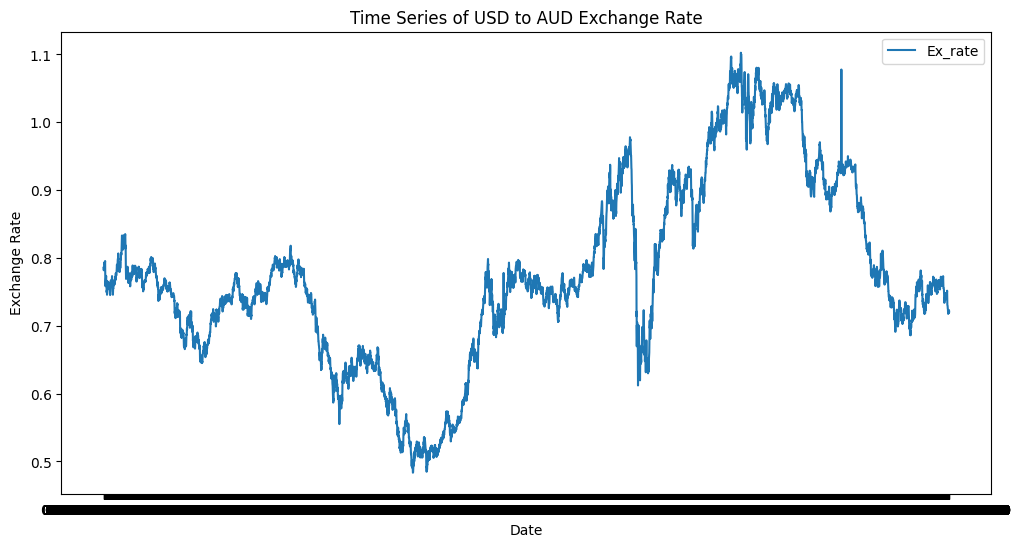

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='Ex_rate')
plt.title('Time Series of USD to AUD Exchange Rate')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

### **Data Preprocessing:**

In [7]:
data.isnull().sum()

,0
Ex_rate,0


No Null Values

## **Part 2: Model Building - ARIMA:**

### **Parameter Selection for ARIMA:**

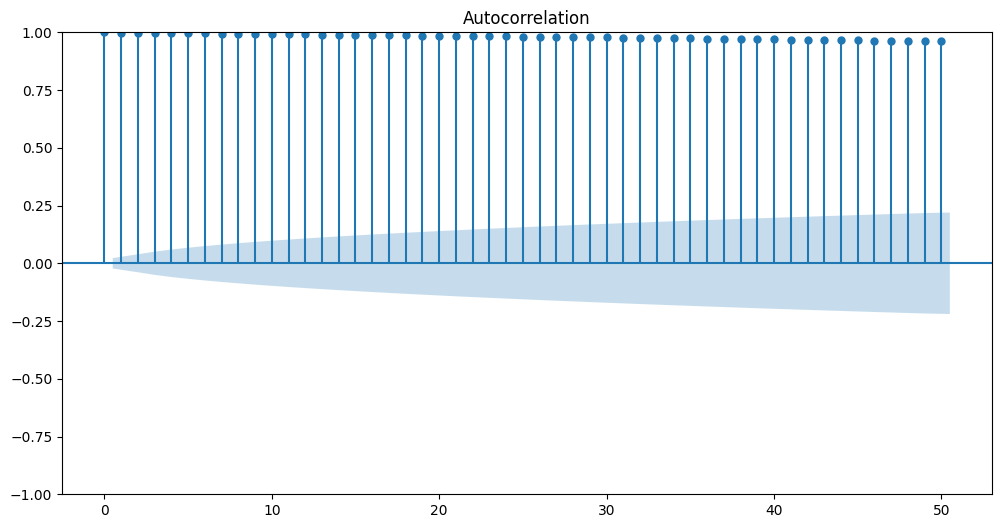

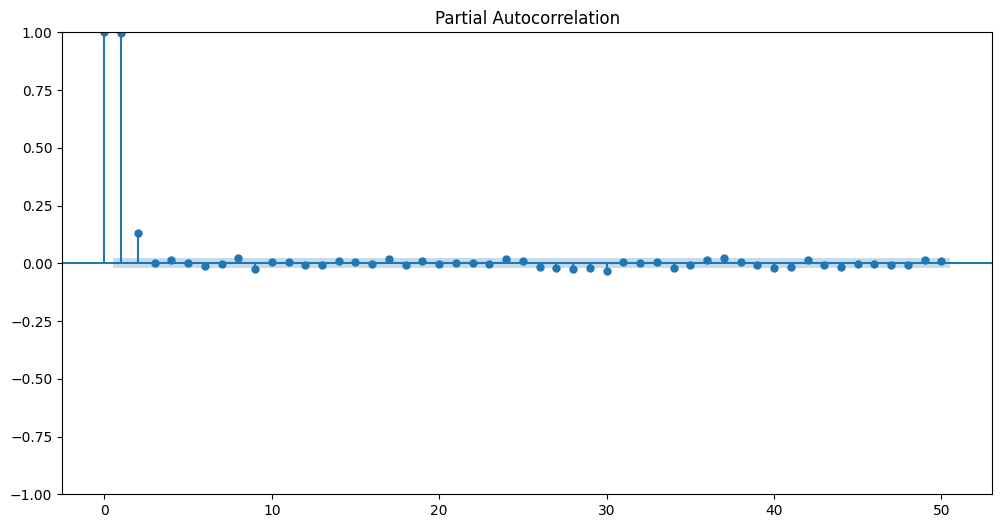

In [8]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(data['Ex_rate'], lags=50, ax=plt.gca())
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data['Ex_rate'], lags=50, ax=plt.gca())
plt.show()


### **Model Fitting:**

In [9]:
# Define the ARIMA model
model = ARIMA(data['Ex_rate'], order=(1, 1, 1))

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sat, 21 Dec 2024   AIC                         -56102.322
Time:                        09:43:03   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

### **Diagnostics:**

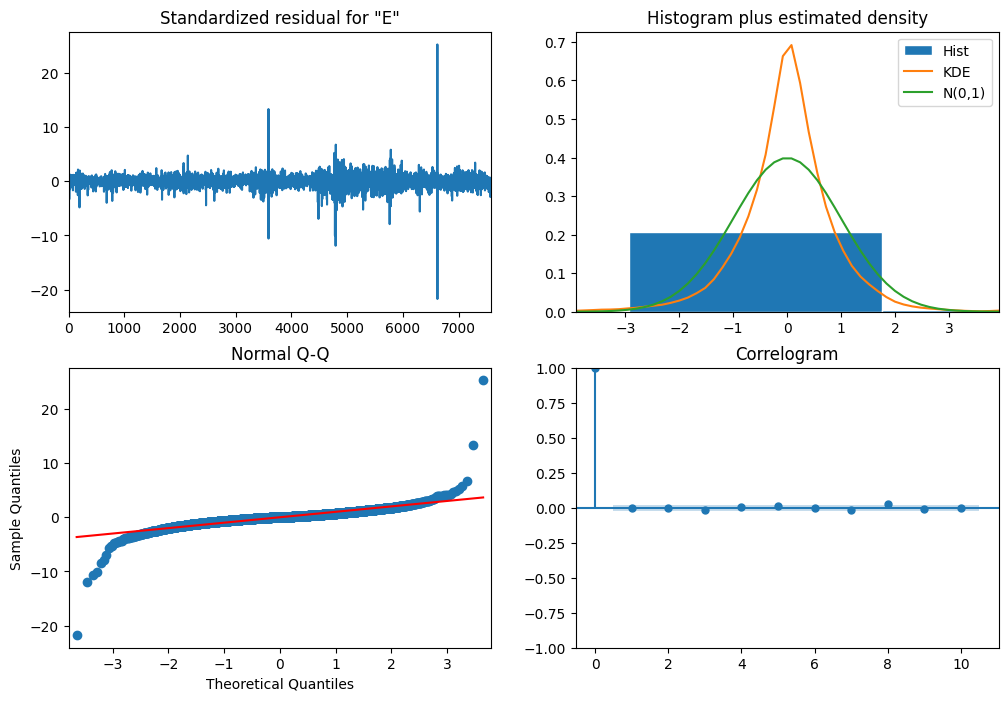

In [15]:
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()

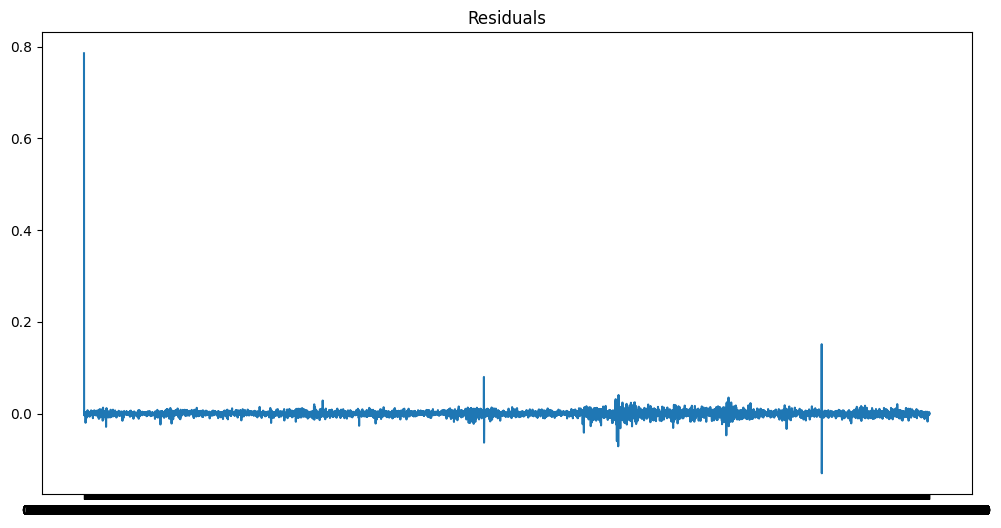

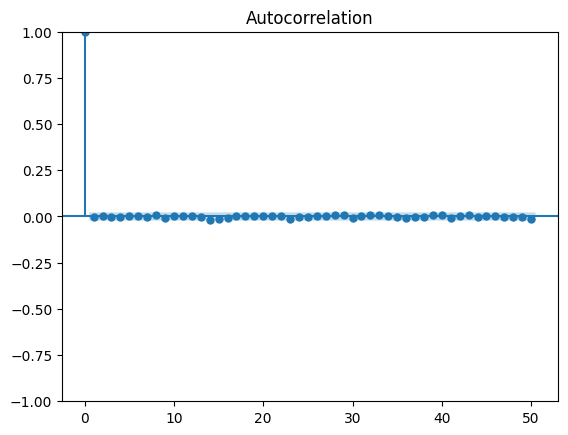

In [16]:
# Plot the residuals
plt.figure(figsize=(12, 6))
plt.plot(model_fit.resid)
plt.title('Residuals')
plt.show()

# Plot ACF of residuals to check for patterns
plot_acf(model_fit.resid, lags=50)
plt.show()


### **Forecasting:**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


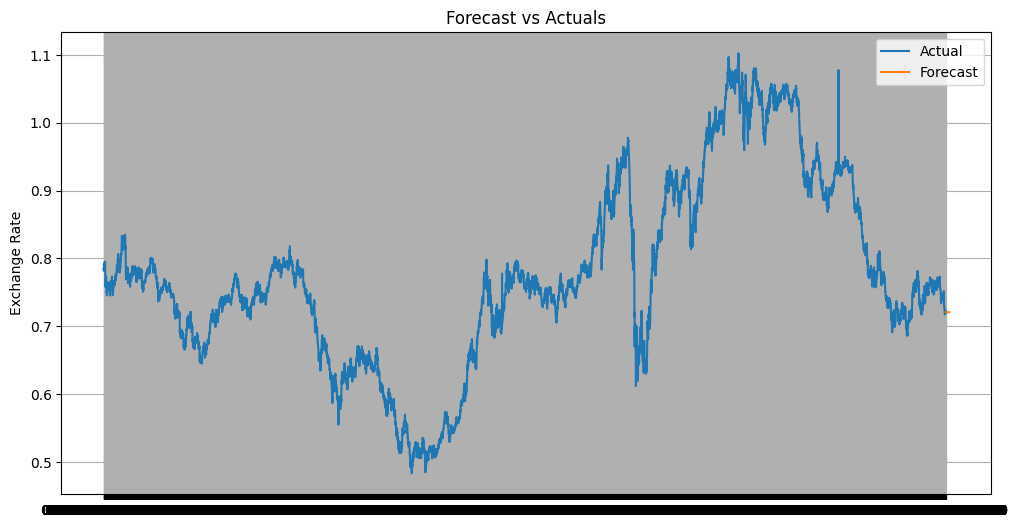

In [17]:
# Forecast
forecast = model_fit.forecast(steps=30)  # Forecast next 30 steps

# Plot the forecast vs actuals
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='Actual')
plt.plot(forecast, label='Forecast')
plt.title('Forecast vs Actuals')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()


## **Part 3: Model Building - Exponential Smoothing**

### **Model Selection:**

In [18]:
# Holt-Winters Seasonal Model
model2 = ExponentialSmoothing(data['Ex_rate'], trend='add', seasonal='add', seasonal_periods=12)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


### **Model Fitting:**

In [19]:
# Fit the model
model2_fit = model2.fit(optimized=True)

# Print the model summary
print(model2_fit.summary())


                       ExponentialSmoothing Model Results                       
Dep. Variable:                  Ex_rate   No. Observations:                 7588
Model:             ExponentialSmoothing   SSE                              0.273
Optimized:                         True   AIC                         -77624.574
Trend:                         Additive   BIC                         -77513.625
Seasonal:                      Additive   AICC                        -77624.483
Seasonal Periods:                    12   Date:                 Sat, 21 Dec 2024
Box-Cox:                          False   Time:                         09:45:35
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.8702071                alpha                 True
smoothing_trend          

### **Forecasting:**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


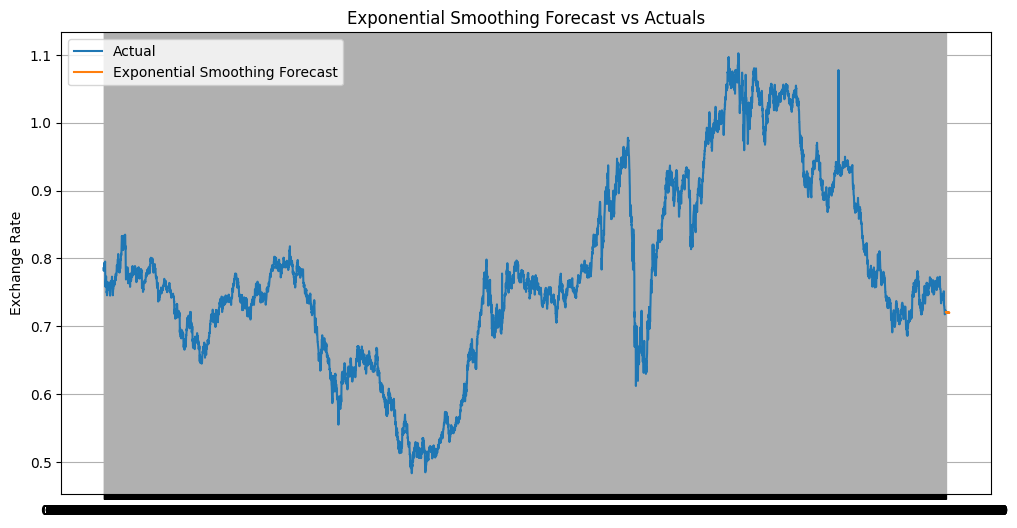

In [20]:
# Forecast
exp_forecast = model2_fit.forecast(steps=30)  # Forecast next 30 steps

# Plot the forecast vs actuals
plt.figure(figsize=(12, 6))
plt.plot(data['Ex_rate'], label='Actual')
plt.plot(exp_forecast, label='Exponential Smoothing Forecast')
plt.title('Exponential Smoothing Forecast vs Actuals')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()


## **Part 4: Evaluation and Comparison**

### **Compute Error Metrics:**

In [21]:
arima_mae = mean_absolute_error(data['Ex_rate'][-30:], forecast)
exp_mae = mean_absolute_error(data['Ex_rate'][-30:], exp_forecast)

In [22]:
arima_rmse = np.sqrt(mean_squared_error(data['Ex_rate'][-30:], forecast))
exp_rmse = np.sqrt(mean_squared_error(data['Ex_rate'][-30:], exp_forecast))

### **Model Comparison:**

In [23]:
print(f'ARIMA MAE: {arima_mae}, RMSE: {arima_rmse}')
print(f'Exponential Smoothing MAE: {exp_mae}, RMSE: {exp_rmse}')

ARIMA MAE: 0.012724006489305202, RMSE: 0.016982710912755217
Exponential Smoothing MAE: 0.013017654522635458, RMSE: 0.017245999955208903


ARIMA Model yielded the best performance for forecasting exchange rates in this dataset as it has less MAE and RMSE compare to Exponential Smoothing Model......